**Advanced Deep Learning 2023**

**Exercise 1**

**Juuso Paakkunainen 70579167**

Create your own Convolutional Neural Network (CNN) and implement Sigmoid, Hyperbolic Tangent, ReLU,
ELU and SELU node function (activation function) on the MNIST and CIFAR10 dataset, plot training loss and
validation loss by epoch, training accuracy and validation accuracy by epoch, which node function is the
most suitable one for MNIST and CIFAR10 dataset, respectively?


Notes:
1. MNIST database link: http://yann.lecun.com/exdb/mnist/, in MNIST dataset 60000 images for
training and 10000 images for testing
2. CIFAR10 database link: https://www.cs.toronto.edu/~kriz/cifar.html, in CIFAR10 dataset 50000
images for training and 10000 images for testing
3. Recommended to use Google Colab to solve neural network related tasks, it will provide fast
computation speed with enabled GPU hardware in your browser, introduction of Google Colab:
https://colab.research.google.com/?utm_source=scs-index , how to enable GPU:
https://colab.research.google.com/notebooks/gpu.ipynb

In [ ]:
# Imports

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
# Defining the activation functions:

def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

def tanh(x):
    return tf.tanh(x)

def relu(x):
    return tf.maximum(0.0, x)

def elu(x, alpha=1.0):
    return tf.where(x > 0, x, alpha * (tf.exp(x) - 1))

def selu(x, alpha=1.67326, scale=1.0507):
    return scale * tf.where(x > 0, x, alpha * (tf.exp(x) - 1))

Loading the CIFAR10 dataset and normalizing the pictures

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 6s 0us/step


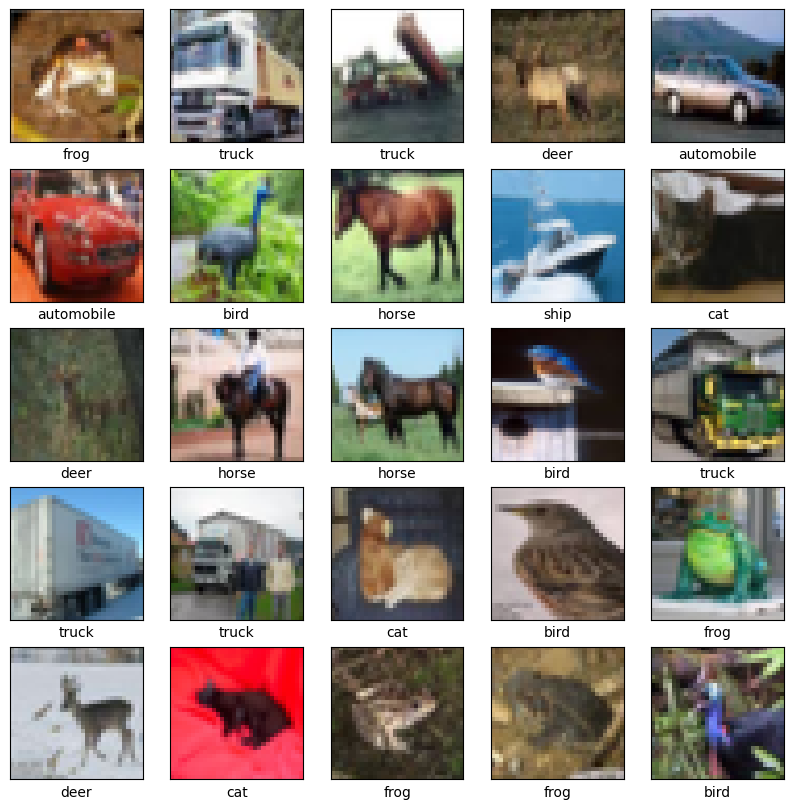

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Loading in the MNIST dataset and normalizing the pictures

In [ ]:
(mnist_train, mnist_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [ ]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label


In [ ]:
mnist_train = mnist_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
mnist_train = mnist_train.cache()
mnist_train = mnist_train.shuffle(ds_info.splits['train'].num_examples)
mnist_train = mnist_train.batch(128)
mnist_train = mnist_train.prefetch(tf.data.AUTOTUNE)

In [ ]:
mnist_test = mnist_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
mnist_test = mnist_test.batch(128)
mnist_test = mnist_test.cache()
mnist_test = mnist_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
# Create an array that contains all the wanted activation functions

activation_functions = [sigmoid, tanh, relu, elu, selu]
activation_function_names = ['Sigmoid', 'Tanh', 'ReLU', 'ELU', 'SELU']

Building the CNN model for both datasets separately

In [ ]:
def build_model(dataset, activation_function):

    if dataset == 'cifar':
      model = Sequential([
          layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(64, (3, 3), activation=activation_function),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(64, (3, 3), activation=activation_function),
          layers.Flatten(),
          layers.Dense(64, activation=activation_function),
          layers.Dense(10)
      ])

    if dataset == 'mnist':
      model = Sequential([
          layers.Reshape((28, 28, 1), input_shape=(28, 28)),
          layers.Conv2D(32, (3, 3), activation=activation_function),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(64, (3, 3), activation=activation_function),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(64, (3, 3), activation=activation_function),
          layers.Flatten(),
          layers.Dense(64, activation=activation_function),
          layers.Dense(10)
      ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title + ' - Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title + ' - Accuracy')
    plt.legend()
    plt.show()

Training the model using every activation function on the CIFAR dataset

Epoch 1/10
1563/1563 [==============================] - 21s 6ms/step - loss: 2.1034 - accuracy: 0.2145 - val_loss: 1.7986 - val_accuracy: 0.3527
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6675 - accuracy: 0.3973 - val_loss: 1.5637 - val_accuracy: 0.4315
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5177 - accuracy: 0.4538 - val_loss: 1.4691 - val_accuracy: 0.4670
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4250 - accuracy: 0.4855 - val_loss: 1.3977 - val_accuracy: 0.4916
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3576 - accuracy: 0.5134 - val_loss: 1.3588 - val_accuracy: 0.5066
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2941 - accuracy: 0.5393 - val_loss: 1.3150 - val_accuracy: 0.5259
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2401 - accuracy: 0.5571 - val_loss: 1.2867 - val_accurac

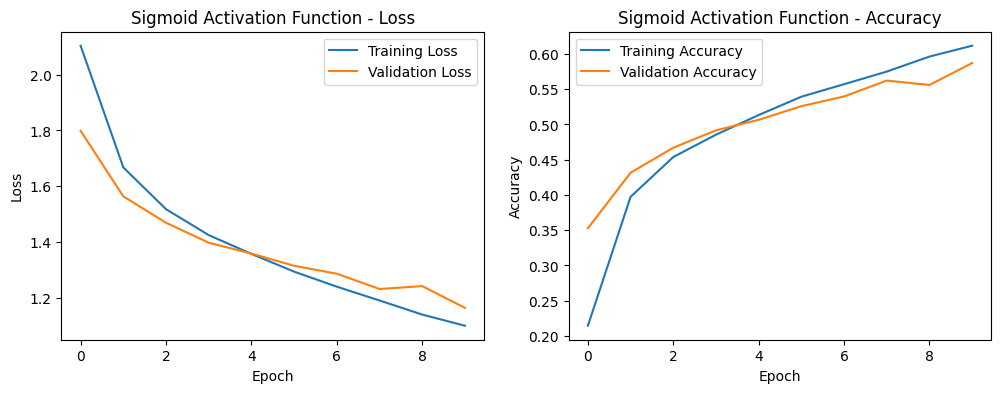

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.4021 - accuracy: 0.5050 - val_loss: 1.2125 - val_accuracy: 0.5773
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1168 - accuracy: 0.6103 - val_loss: 1.1001 - val_accuracy: 0.6174
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0198 - accuracy: 0.6467 - val_loss: 1.0536 - val_accuracy: 0.6401
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9478 - accuracy: 0.6738 - val_loss: 1.0280 - val_accuracy: 0.6514
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9015 - accuracy: 0.6874 - val_loss: 1.0044 - val_accuracy: 0.6560
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8520 - accuracy: 0.7055 - val_loss: 1.0347 - val_accuracy: 0.6479
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8115 - accuracy: 0.7175 - val_loss: 0.9896 - val_accuracy

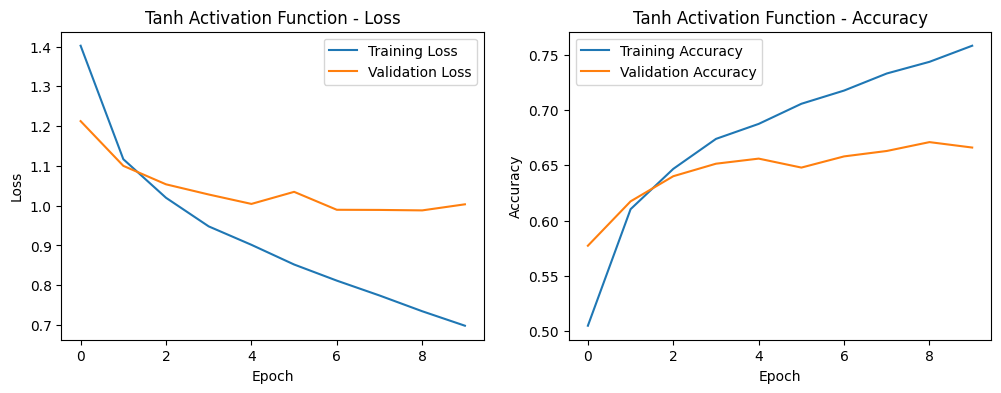

TypeError: ignored

In [ ]:
for i, activation_function in enumerate(activation_functions):
    model = build_model('cifar', activation_function)
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
    title = f'{activation_function_names[i]} Activation Function'
    plot_history(history, title)

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.5167 - accuracy: 0.4479 - val_loss: 1.3848 - val_accuracy: 0.4937
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1668 - accuracy: 0.5860 - val_loss: 1.0604 - val_accuracy: 0.6215
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0152 - accuracy: 0.6423 - val_loss: 0.9730 - val_accuracy: 0.6512
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9196 - accuracy: 0.6755 - val_loss: 0.9619 - val_accuracy: 0.6617
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8508 - accuracy: 0.6982 - val_loss: 0.9718 - val_accuracy: 0.6654
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7897 - accuracy: 0.7223 - val_loss: 0.9002 - val_accuracy: 0.6843
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7401 - accuracy: 0.7387 - val_loss: 0.8775 - val_accuracy

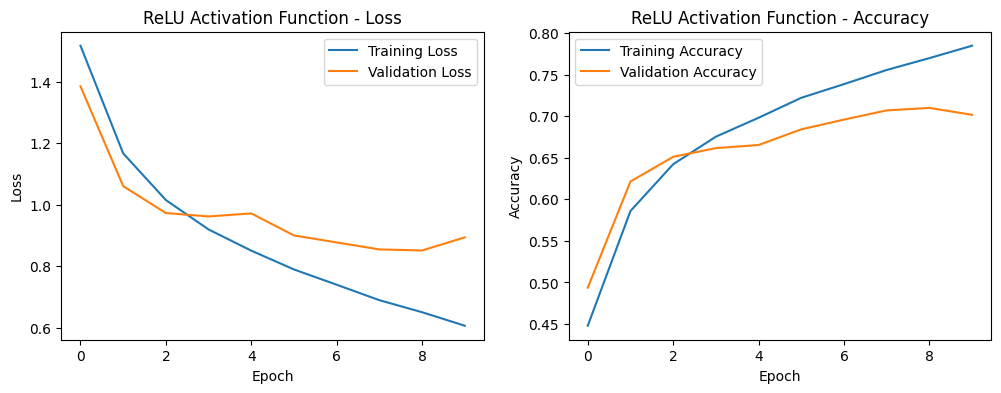

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4158 - accuracy: 0.4965 - val_loss: 1.1536 - val_accuracy: 0.5930
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0903 - accuracy: 0.6176 - val_loss: 1.0370 - val_accuracy: 0.6420
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9476 - accuracy: 0.6672 - val_loss: 0.9997 - val_accuracy: 0.6628
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8433 - accuracy: 0.7053 - val_loss: 0.9607 - val_accuracy: 0.6742
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7649 - accuracy: 0.7311 - val_loss: 0.8724 - val_accuracy: 0.7017
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6958 - accuracy: 0.7551 - val_loss: 0.8807 - val_accuracy: 0.7094
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6402 - accuracy: 0.7744 - val_loss: 0.8909 - val_accurac

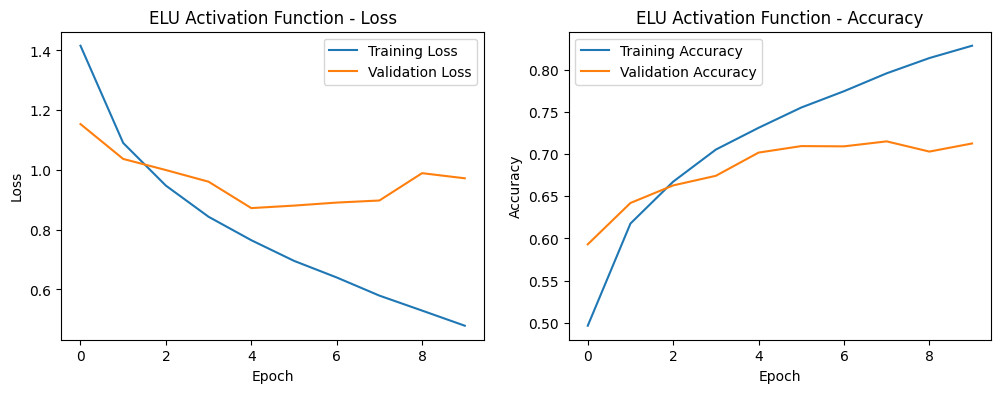

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4429 - accuracy: 0.4872 - val_loss: 1.2529 - val_accuracy: 0.5584
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1671 - accuracy: 0.5918 - val_loss: 1.2263 - val_accuracy: 0.5825
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0392 - accuracy: 0.6388 - val_loss: 1.0954 - val_accuracy: 0.6240
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9390 - accuracy: 0.6743 - val_loss: 0.9967 - val_accuracy: 0.6581
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8708 - accuracy: 0.6967 - val_loss: 1.0416 - val_accuracy: 0.6406
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8139 - accuracy: 0.7158 - val_loss: 0.9807 - val_accuracy: 0.6656
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7560 - accuracy: 0.7359 - val_loss: 1.0167 - val_acc

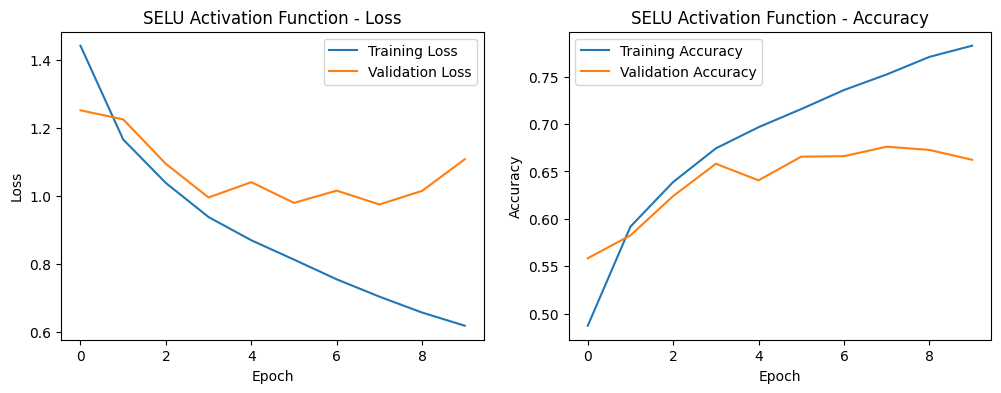

In [ ]:
for i in range(2, len(activation_functions)):
    activation_function = activation_functions[i]
    model = build_model('cifar', activation_function)
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
    title = f'{activation_function_names[i]} Activation Function'
    plot_history(history, title)


Training the model using every activation function on the MNIST dataset

Epoch 1/6
469/469 [==============================] - 19s 10ms/step - loss: 1.2756 - accuracy: 0.5782 - val_loss: 0.3201 - val_accuracy: 0.9202
Epoch 2/6
469/469 [==============================] - 4s 9ms/step - loss: 0.2216 - accuracy: 0.9412 - val_loss: 0.1449 - val_accuracy: 0.9594
Epoch 3/6
469/469 [==============================] - 4s 7ms/step - loss: 0.1268 - accuracy: 0.9641 - val_loss: 0.0939 - val_accuracy: 0.9731
Epoch 4/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0924 - accuracy: 0.9735 - val_loss: 0.0766 - val_accuracy: 0.9761
Epoch 5/6
469/469 [==============================] - 4s 9ms/step - loss: 0.0727 - accuracy: 0.9789 - val_loss: 0.0744 - val_accuracy: 0.9781
Epoch 6/6
469/469 [==============================] - 4s 7ms/step - loss: 0.0631 - accuracy: 0.9814 - val_loss: 0.0542 - val_accuracy: 0.9833


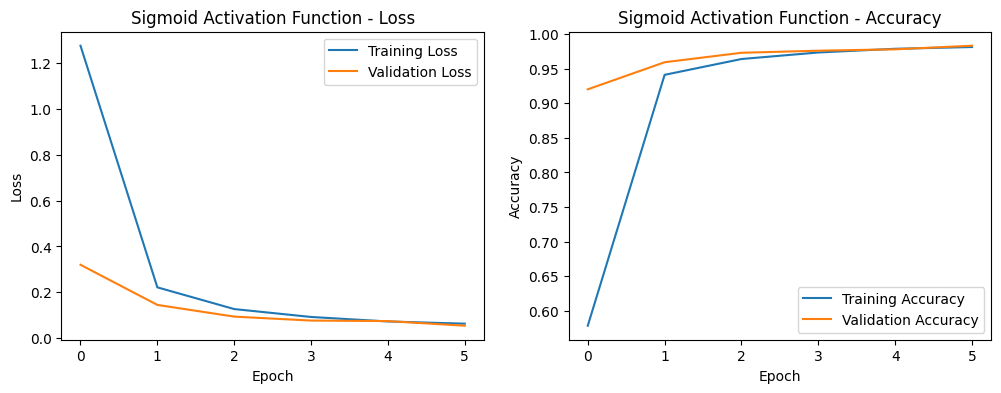

Epoch 1/6
469/469 [==============================] - 4s 6ms/step - loss: 0.2149 - accuracy: 0.9402 - val_loss: 0.0536 - val_accuracy: 0.9852
Epoch 2/6
469/469 [==============================] - 5s 10ms/step - loss: 0.0554 - accuracy: 0.9836 - val_loss: 0.0412 - val_accuracy: 0.9875
Epoch 3/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.0408 - val_accuracy: 0.9869
Epoch 4/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0288 - accuracy: 0.9914 - val_loss: 0.0392 - val_accuracy: 0.9877
Epoch 5/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0234 - accuracy: 0.9929 - val_loss: 0.0303 - val_accuracy: 0.9906
Epoch 6/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0167 - accuracy: 0.9954 - val_loss: 0.0328 - val_accuracy: 0.9912


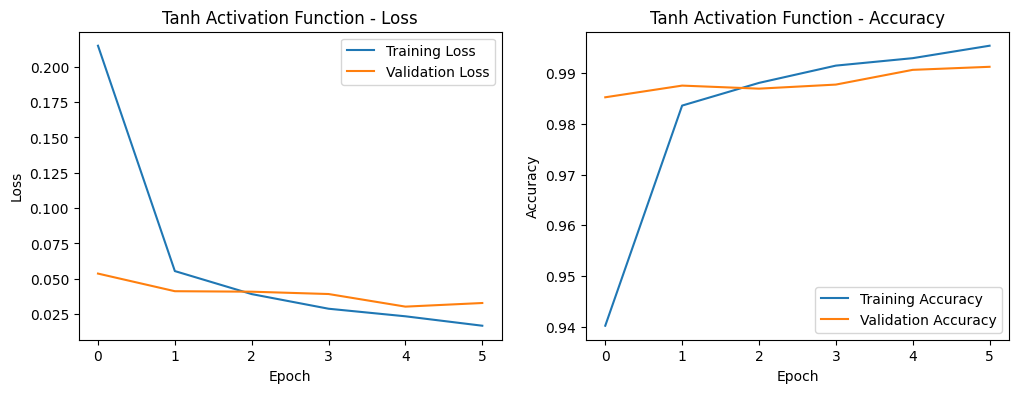

Epoch 1/6
469/469 [==============================] - 7s 7ms/step - loss: 0.2480 - accuracy: 0.9253 - val_loss: 0.0644 - val_accuracy: 0.9789
Epoch 2/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0637 - accuracy: 0.9806 - val_loss: 0.0412 - val_accuracy: 0.9881
Epoch 3/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0420 - accuracy: 0.9873 - val_loss: 0.0357 - val_accuracy: 0.9883
Epoch 4/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0351 - accuracy: 0.9894 - val_loss: 0.0376 - val_accuracy: 0.9887
Epoch 5/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0277 - val_accuracy: 0.9915
Epoch 6/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0321 - val_accuracy: 0.9892


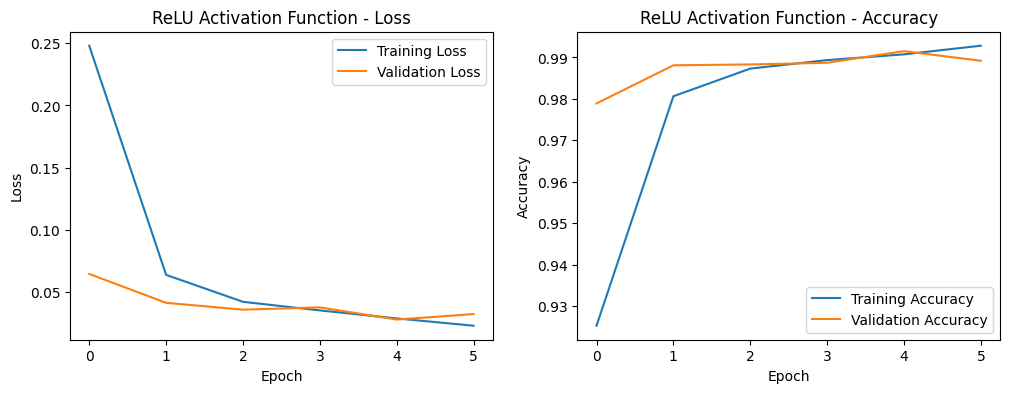

Epoch 1/6
469/469 [==============================] - 5s 8ms/step - loss: 0.2033 - accuracy: 0.9404 - val_loss: 0.0569 - val_accuracy: 0.9811
Epoch 2/6
469/469 [==============================] - 4s 7ms/step - loss: 0.0531 - accuracy: 0.9840 - val_loss: 0.0420 - val_accuracy: 0.9866
Epoch 3/6
469/469 [==============================] - 4s 9ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0350 - val_accuracy: 0.9879
Epoch 4/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0444 - val_accuracy: 0.9848
Epoch 5/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0356 - val_accuracy: 0.9890
Epoch 6/6
469/469 [==============================] - 4s 9ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0306 - val_accuracy: 0.9904


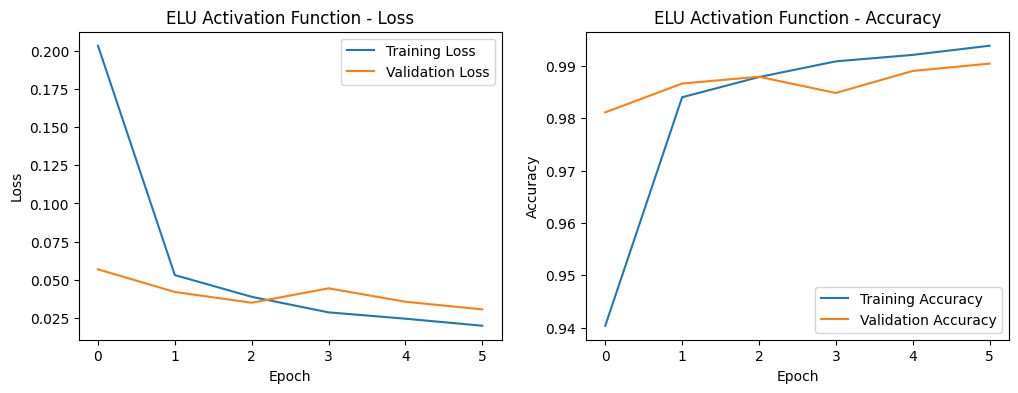

Epoch 1/6
469/469 [==============================] - 6s 9ms/step - loss: 0.2000 - accuracy: 0.9412 - val_loss: 0.0639 - val_accuracy: 0.9804
Epoch 2/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0611 - accuracy: 0.9812 - val_loss: 0.0462 - val_accuracy: 0.9851
Epoch 3/6
469/469 [==============================] - 4s 9ms/step - loss: 0.0450 - accuracy: 0.9859 - val_loss: 0.0443 - val_accuracy: 0.9863
Epoch 4/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0334 - accuracy: 0.9897 - val_loss: 0.0380 - val_accuracy: 0.9878
Epoch 5/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0386 - val_accuracy: 0.9885
Epoch 6/6
469/469 [==============================] - 5s 10ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0413 - val_accuracy: 0.9887


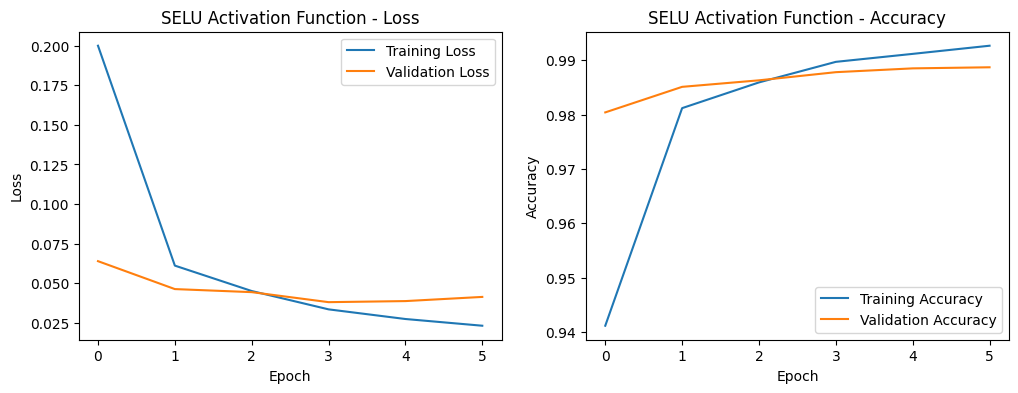

In [ ]:
for i, activation_function in enumerate(activation_functions):
    model = build_model('mnist', activation_function)
    history = model.fit(mnist_train, epochs=6, validation_data=mnist_test)
    title = f'{activation_function_names[i]} Activation Function'
    plot_history(history, title)

Conclusion:

The best activation function for the CIFAR-10 dataset was ELU. CIFAR-10 contains color images with more complex patterns and features compared to MNIST. ELU has been observed to perform well in deep networks, especially in scenarios with noisy or complex data. It allows the model to capture more nuanced patterns in the images.

For the MNIST dataset, the best activation function was Tanh. The MNIST dataset consists of grayscale images with pixel values in the range [0, 255]. The Tanh function, with its output range of [-1, 1], is a better match to the distribution of pixel values in grayscale images compared to activation functions like sigmoid.

EXTRA: Lets test the CIFAR model on random pictures from the Internet

1/1 [==============================] - 0s 109ms/step


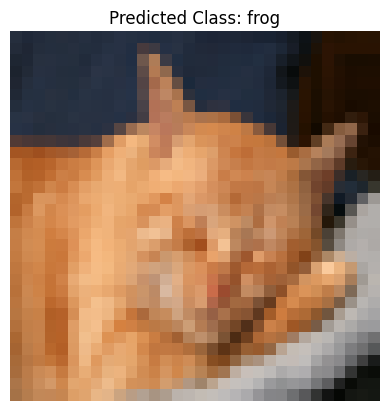

Class Probabilities:
airplane: -0.13
automobile: -0.03
bird: -0.04
cat: -0.03
deer: -0.13
dog: -0.06
frog: -0.01
horse: -0.12
ship: -0.11
truck: -0.02


In [ ]:
import requests
from PIL import Image
import numpy as np
import tensorflow as tf
from io import BytesIO
import matplotlib.pyplot as plt

model = build_model(relu)

image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/RedCat_8727.jpg/1200px-RedCat_8727.jpg"

response = requests.get(image_url)

if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    image = image.resize((32, 32))
    image = np.array(image)
    image = image / 255.0

    model = build_model(relu)

    predictions = model.predict(image[tf.newaxis, ...])
    predicted_class = tf.argmax(predictions, axis=1)
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    predicted_label = class_names[predicted_class[0]]

    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_label}")
    plt.axis('off')
    plt.show()

    print("Class Probabilities:")
    for i in range(len(class_names)):
        class_prob = predictions[0][i]
        class_name = class_names[i]
        print(f"{class_name}: {class_prob:.2f}")
else:
    print("Failed to download the image.")
